# МОМО, II семестр. Домашнее задание №3

## 1) Импорт библиотек

In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"

from sklearn.ensemble import RandomForestRegressor # Случайный лес для Регрессии от scikit-learn
import xgboost # внешняя библиотека для модели бустинга

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
from sklearn.model_selection import GridSearchCV # функция для поиска наилучших параметров по сетке

from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
from sklearn.preprocessing import PolynomialFeatures # Создание полимиальных признаков

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели
from sklearn.compose import TransformedTargetRegressor # Для оценки влияния предобработки таргера

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR) # Чтобы на нас не ругались из-за того что matplot.lib проломали шрифты

import warnings
warnings.filterwarnings('ignore')

## 2) Набор данных

Набор данных представляет собой объявления о продажах автомобилей на вторичном рынке в Москве за 2020 год. Данные предоставлены с сайта auto.ru и взяты с платформы kaggle.
Данные содержат следующие колонки:

**Model** = Модель автомобиля\
**Year** = Год производства\
**Mileage** = Пробег, км\
**V_engine** = Объем двигателя, л\
**EngineType** = Тип топлива используемый двигателем\
**HorsePower** = Мощность двигателя, л.с.\
**Tax** = Сумма налога на ТС\
**State** = Состояние автомобиля\
**Owners** = Количество владельцев\
**Passport** = Оригинал или дубликат ПТС\
**Customs** = Таможенная очистка\
**Selector** = Тип трансмиссии\
**Color** = Цвет\
**CarBodyType** = Тип кузова\
**Accidents** = Количество ДТП\
**Drive** = Тип привода\
**Price** = Цена

## 3) Предварительная обработка данных.
Предварительная обработка данных выполнена в рамках [Домашнего задания №1, I семестр](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+URFUML2023+SEP2023/block-v1:Skillfactory+URFUML2023+SEP2023+type@sequential+block@4d952a3ad913418eb1e71373aa4c54a9/block-v1:Skillfactory+URFUML2023+SEP2023+type@vertical+block@de98e0c578044022badc0747bd026709?homework=4233) \
Загрузим уже обработанные данные:


In [2]:
df = pd.read_csv('autoru_final.csv')

In [3]:
df.sample(3)

,Unnamed: 0,V_engine,Mileage,Year,HorsePower,Price,Owners,Passport,EngineType_ Бензин,"EngineType_ Бензин, газобаллонное оборудование",...,Manufacturer_Nissan,Manufacturer_Opel,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_SEAT,Manufacturer_Skoda,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen
23578,23578,-0.896013,0.188749,-0.598286,-1.192599,380000.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23122,23122,-0.465647,0.075106,0.233369,-0.174922,1095000.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20320,20320,-0.680830,0.254999,-1.479025,-1.043041,250000.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
# удалим незначащий индексный столбец
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.sample(3)

,V_engine,Mileage,Year,HorsePower,Price,Owners,Passport,EngineType_ Бензин,"EngineType_ Бензин, газобаллонное оборудование",EngineType_ Газ,...,Manufacturer_Nissan,Manufacturer_Opel,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_SEAT,Manufacturer_Skoda,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen
5016,-0.680830,0.156999,0.411342,-0.001748,555000.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15930,-0.035282,0.094099,0.593399,-0.001748,1612000.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15233,-0.250464,0.123999,1.165011,-1.043041,2350000.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4) Построение моделей машинного обучения

Разбиваем данные на тренировочную и тестовую выборки:

In [6]:
# Создаем таргет и удаляем таргет из датасета
X, y = df.drop(columns = ['Price']), df['Price']

In [7]:
# Разбиваем выборки на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
X_train.head(3)

,V_engine,Mileage,Year,HorsePower,Owners,Passport,EngineType_ Бензин,"EngineType_ Бензин, газобаллонное оборудование",EngineType_ Газ,"EngineType_ Газ, газобаллонное оборудование",...,Manufacturer_Nissan,Manufacturer_Opel,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_SEAT,Manufacturer_Skoda,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen
23762,-0.250464,0.057999,0.779634,0.430558,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1718,2.008956,0.155999,0.970140,1.890544,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19217,0.825450,0.105999,0.593399,1.501889,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.1 Построим baseline модель с использованием только числовых признаков

In [9]:
# Список числовых признаков
num_columns = ['Year', 'Mileage', 'V_engine', 'HorsePower']

In [10]:
# Получим значения только числовых признаков для обучения базовой модели
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

#### 4.1.1 Random Forrest

In [11]:
# В качестве первой модели выберем Случайный лес с параметрами по умолчанию
model = RandomForestRegressor(random_state=42)
model.fit(X_train_num, y_train)

RandomForestRegressor(random_state=42)

#### Нарисуем значимость признаков

In [12]:
def feature_importance_plotter_N(model, features_names, N='all'):
    """Отрисовка значимости признаков в виде горизонтальных столбчатых диаграмм.
    Параметры:
    ===========
    model: модель
    features_names: список имен признаков
    """
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)
    if N == 'all':
        N = len(feature_importance)
    else:
        sorted = sorted[N * (-1):]
    ypos = np.arange(N)
    fig= plt.figure(figsize=(8, 4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos, np.hstack(features_names)[sorted])

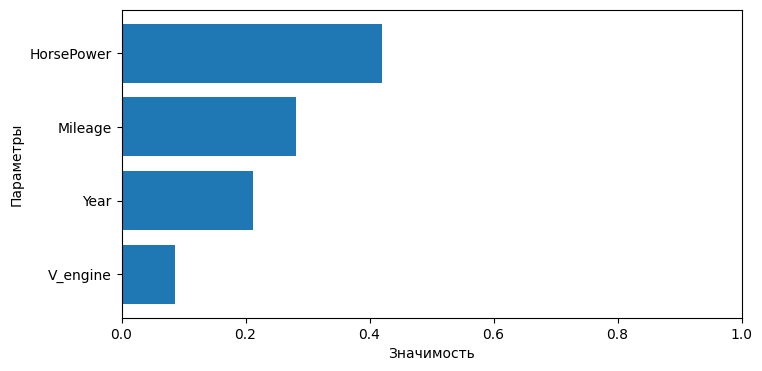

In [13]:
feature_importance_plotter_N(model, num_columns)

#### Метрики базовой модели:

In [14]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, model.predict(X_train_num)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, model.predict(X_test_num)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, model.predict(X_train_num)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, model.predict(X_test_num)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, model.predict(X_train_num), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, model.predict(X_test_num), squared=False):.4f}")

r2 на тренировочной выборке: 0.9854
r2 на валидационной выборке: 0.8728
mse на тренировочной выборке: 42979841651.9934
mse на валидационной выборке: 368881239169.0088
rmse на тренировочной выборке: 207315.8017
rmse на валидационной выборке: 607355.9411


#### Визуализация ошибок

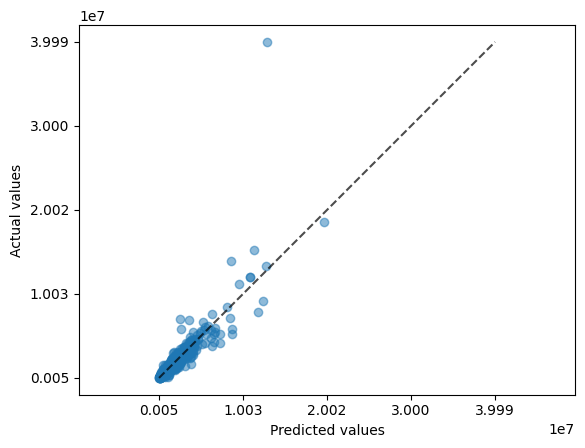

In [15]:
PredictionErrorDisplay.from_predictions(
    y_test,
    model.predict(X_test_num),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

#### 4.1.2 XGBoost

In [16]:
# В качестве внешней второй модели выберем XGBoost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train_num, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Нарисуем значимость признаков

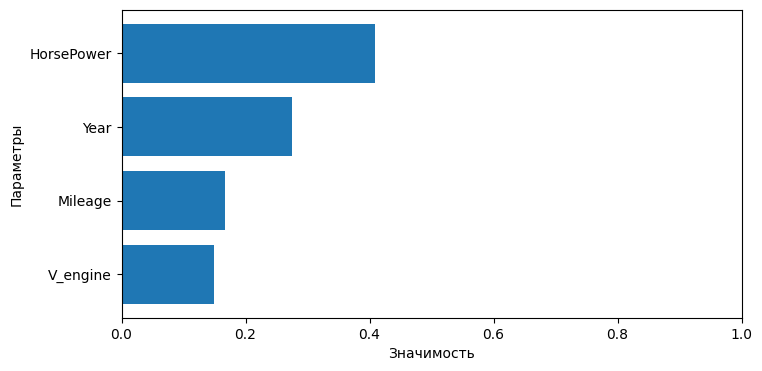

In [17]:
feature_importance_plotter_N(xgb, num_columns)

#### Метрики модели:

In [18]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, xgb.predict(X_train_num)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, xgb.predict(X_test_num)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, xgb.predict(X_train_num)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, xgb.predict(X_test_num)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, xgb.predict(X_train_num), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, xgb.predict(X_test_num), squared=False):.4f}")

r2 на тренировочной выборке: 0.9699
r2 на валидационной выборке: 0.8810
mse на тренировочной выборке: 88697333728.2502
mse на валидационной выборке: 345011802582.2656
rmse на тренировочной выборке: 297820.9760
rmse на валидационной выборке: 587377.0532


#### Визуализация ошибок

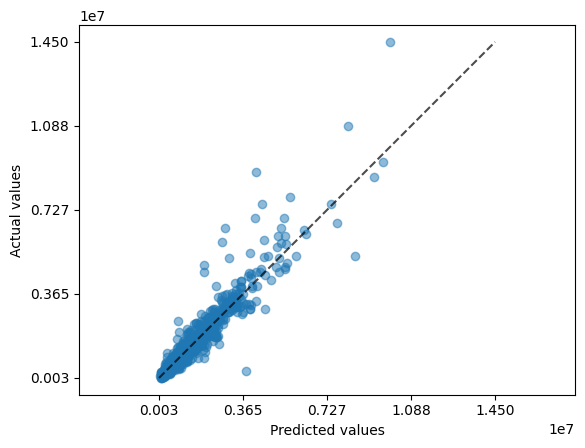

In [19]:
PredictionErrorDisplay.from_predictions(
    y_test,
    xgb.predict(X_test_num),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Предварительные выводы (базовые модели):**
1. Погрешность предсказания цены, используя лишь 4 числовых признаков сразу показывает хорошие результаты. Даже с параметрами по умолчанию обе модели показывают самые лучшие показателей среди всех ранее изученных моделей.
2. Для обоих моделей выбросы небольшие и распределены от средних к высоким, что намного лучше чем в аналогичной базовой линейной модели.
3. Метрика R2 на валидационной выборке:
    - *Random Forest*: 0.8728
    - *XGBoost*: 0.8810
    что намного лучше чем у базовой [линейной модели из I семестра](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+URFUML2023+SEP2023/block-v1:Skillfactory+URFUML2023+SEP2023+type@sequential+block@d2116c46b42747f28fe973e78452d838/block-v1:Skillfactory+URFUML2023+SEP2023+type@vertical+block@284df12c828d4c6cafeb376d46275c4b?homework=4253) 0.5018.
4. Обе модели "согласились", что самый значимый признак **"Мощность"**, а самый менее значимый **"Объём двигателя"**. Признаки **"Год выпуска"** и **"Пробег"** модели поставили на разные уровни значимости.
5. Модели не обнулили ни один признак и все числовые признаки значимые, но в разной степени.
6. Модели склонны к переобучению, т.к. метрики на тестовой выборке сильно меньше метрик на тестовой выборке. Но модель на основе бустинга (*XGBoost*) переобучилась чуть меньше.


### 4.2 Подборка наилучших параметров методом GridSearch

In [20]:
# оптимизатор GridSearch
def grid_optimizer(model, X, y, param_grids, cv=5):
    gs = GridSearchCV(model, 
                      param_grid=param_grids, 
                      cv=cv, 
                      scoring='neg_mean_squared_error')
    gs.fit(X, y)
    print(f"Best MSE-score: {gs.best_score_}")
    print(f"Best params: {gs.best_params_}")
    return gs.best_estimator_

#### 4.2.1 Random Forrest

In [21]:
# тип модели и сетка параметров для поиска по GridSearchCV
rfr = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
}

In [22]:
# Найдем наилучшие параметры модели Random Forest для дальнейшего анализа.
best_rfr = grid_optimizer(rfr, X_train_num, y_train, param_grid, cv=5)

Best MSE-score: -312366777093.73975
Best params: {'max_depth': 15, 'n_estimators': 300}


#### 4.2.2 XGBoost

In [23]:
# тип модели и сетка параметров для поиска по GridSearchCV
xgb= xgboost.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [3, 5, 10],
}

In [24]:
# Найдем наилучшие параметры модели XGBoost для дальнейшего анализа. 
best_xgb = grid_optimizer(xgb, X_train_num, y_train, param_grid, cv=5)

Best MSE-score: -284939461393.975
Best params: {'max_depth': 5, 'n_estimators': 200}


**Итого:** \
Выбранные "деревянные" модели очень сильно склоны к переобучению, что показал анализ baseline моделей. Поэтому составил сетку из не сильно глубоких деревьев и не слишком многочисленных.
Поиск наилучших параметров по сетке выдал следующие результаты для моделей:
   - *Random Forest*: ```{'max_depth': 15, 'n_estimators': 300}```
   - *XGBoost*: ```{'max_depth': 5, 'n_estimators': 200}``` 
   
Полученные параметры лучших моделей будем использовать во всех последующих моделях.

### 4.3 Оценим влияние предварительной обработки целевой переменной

#### 4.3.1 Random Forrest

In [25]:
model_transformed = TransformedTargetRegressor(regressor=RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42), transformer=PowerTransformer())
model_transformed.fit(X_train_num, y_train)

TransformedTargetRegressor(regressor=RandomForestRegressor(max_depth=15,
                                                           n_estimators=300,
                                                           random_state=42),
                           transformer=PowerTransformer())

#### Нарисуем значимость признаков

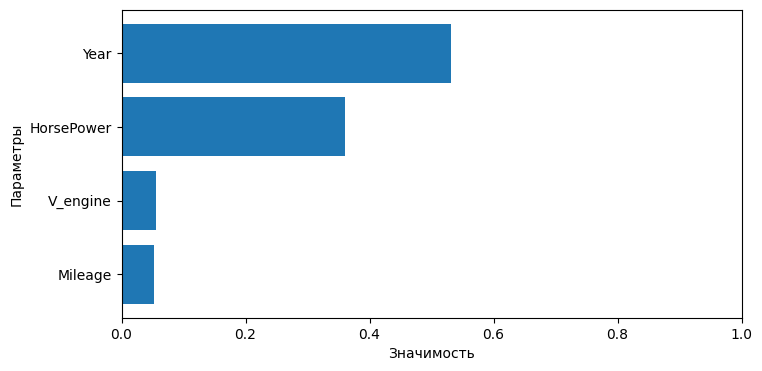

In [26]:
feature_importance_plotter_N(model_transformed.regressor_, num_columns)

#### Метрики модели:

In [27]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, model_transformed.predict(X_train_num)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, model_transformed.predict(X_test_num)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, model_transformed.predict(X_train_num)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, model_transformed.predict(X_test_num)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, model_transformed.predict(X_train_num), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, model_transformed.predict(X_test_num), squared=False):.4f}")

r2 на тренировочной выборке: 0.9716
r2 на валидационной выборке: 0.8745
mse на тренировочной выборке: 83579267868.3306
mse на валидационной выборке: 363771226746.9410
rmse на тренировочной выборке: 289100.7919
rmse на валидационной выборке: 603134.5014


#### Визуализация ошибок

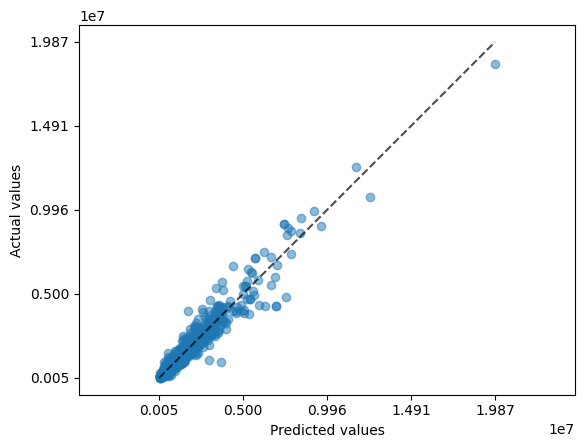

In [28]:
PredictionErrorDisplay.from_predictions(
    y_test,
    model_transformed.predict(X_test_num),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

#### 4.3.2 XGBoost

In [29]:
xgb_transformed = TransformedTargetRegressor(regressor=xgboost.XGBRegressor(n_estimators=200, max_depth=5, random_state=42), transformer=PowerTransformer())
xgb_transformed.fit(X_train_num, y_train)

TransformedTargetRegressor(regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None, gamma=None,
                                                  gpu_id=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=5, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=200, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=42,
                                                  reg_alpha=None,
                                                  reg_lambda=None, ...),
                           transformer=PowerTransformer())

#### Нарисуем значимость признаков

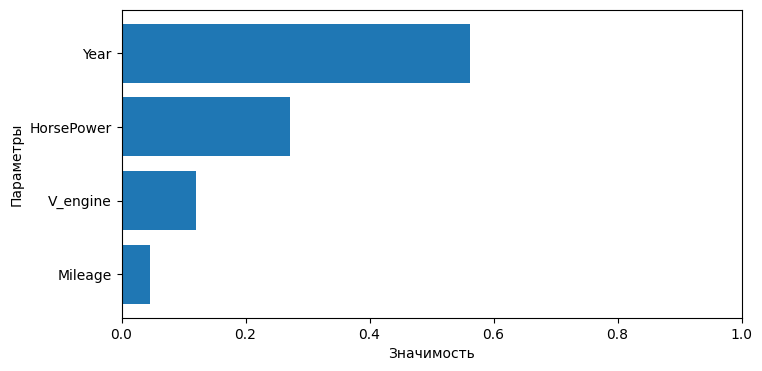

In [30]:
feature_importance_plotter_N(xgb_transformed.regressor_, num_columns)

#### Метрики модели:

In [31]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, xgb_transformed.predict(X_train_num)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, xgb_transformed.predict(X_test_num)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, xgb_transformed.predict(X_train_num)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, xgb_transformed.predict(X_test_num)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, xgb_transformed.predict(X_train_num), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, xgb_transformed.predict(X_test_num), squared=False):.4f}")

r2 на тренировочной выборке: 0.9571
r2 на валидационной выборке: 0.8743
mse на тренировочной выборке: 126211156909.3928
mse на валидационной выборке: 364383038249.6149
rmse на тренировочной выборке: 355262.0961
rmse на валидационной выборке: 603641.4816


#### Визуализация ошибок

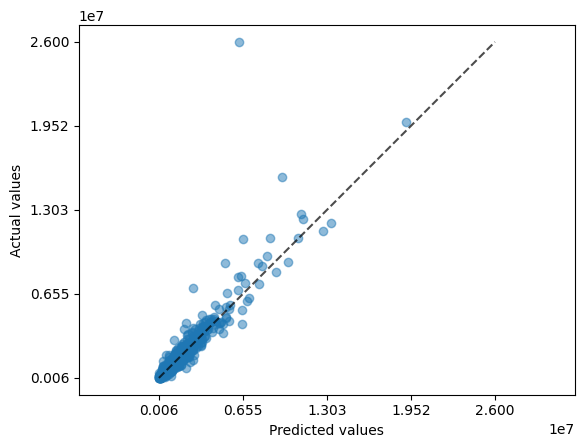

In [32]:
PredictionErrorDisplay.from_predictions(
    y_test,
    model_transformed.predict(X_test_num),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Выводы на базовую модель с предобработанным таргетом**
1. Предварительная обработка целевой переменной не улучшила качество модели:
    - *Random Forest*: незначительный прирост с 0.8728 до 0.8745;
    - *XGBoost*: упало с 0.8810 до 0.8743.
    
    Это связано с особенностями действия деревянной модели - для них закон распределения не сильно важен, т.к. разбиваются ветки по критерию информативности (энтропии).
2. Из-за пункта (1) далее в следующих моделях применяться преобразование целевой переменной не будет.
3. Увеличилось количество и качество ошибочных предсказаний в среднем и высоком ценовом диапазоне, данные ошибки стали с большей дисперсией (разбросом), что говорит об ухудшение модели.
4. Обе модели после преобразования целевой переменной поставили самым значимым параметром **"Год выпуска"**. Вероятно т.к. в пайплане предварительной обработки "Год выпуска" имеет степеное преобразование (см. [Домашнее задание №1, I семестр](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+URFUML2023+SEP2023/block-v1:Skillfactory+URFUML2023+SEP2023+type@sequential+block@4d952a3ad913418eb1e71373aa4c54a9/block-v1:Skillfactory+URFUML2023+SEP2023+type@vertical+block@de98e0c578044022badc0747bd026709?homework=4233) и, следовательно, после степенного преобразования целевой переменной распределения становятся похоже.


### 4.4 Оценка влияния категориальных признаков

#### 4.4.1 Random Forrest

In [33]:
model_categorial = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
model_categorial.fit(X_train, y_train) 

RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)

#### Нарисуем значимость признаков

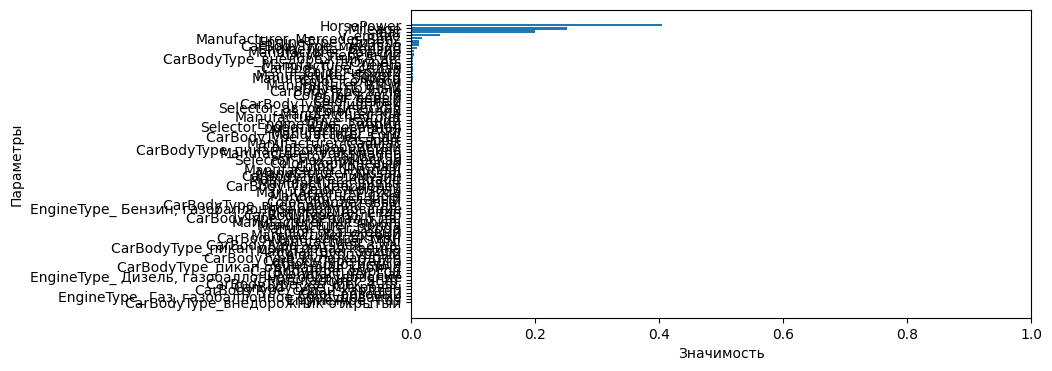

In [34]:
feature_importance_plotter_N(model_categorial, list(X_train.columns))

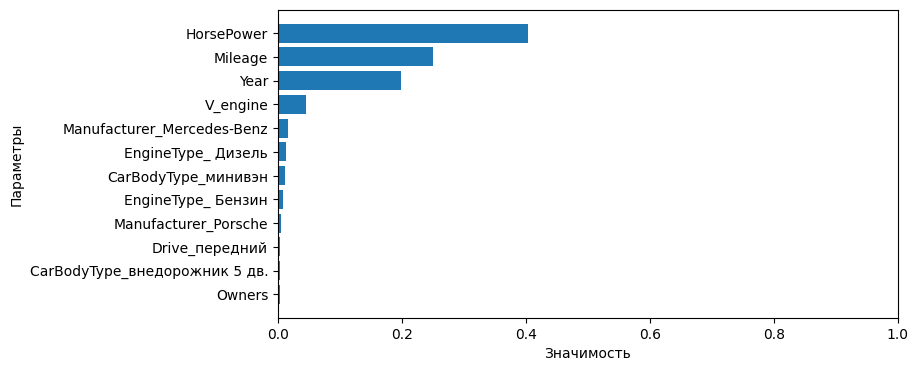

In [35]:
# Покажем лишь первые 12 значимых признаков для наглядности.
feature_importance_plotter_N(model_categorial, list(X_train.columns), N=12)

#### Метрики модели:

In [36]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, model_categorial.predict(X_train)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, model_categorial.predict(X_test)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, model_categorial.predict(X_train)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, model_categorial.predict(X_test)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, model_categorial.predict(X_train), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, model_categorial.predict(X_test), squared=False):.4f}")

r2 на тренировочной выборке: 0.9850
r2 на валидационной выборке: 0.9024
mse на тренировочной выборке: 44259182192.4225
mse на валидационной выборке: 282804571717.6996
rmse на тренировочной выборке: 210378.6638
rmse на валидационной выборке: 531793.7304


#### Визуализация ошибок

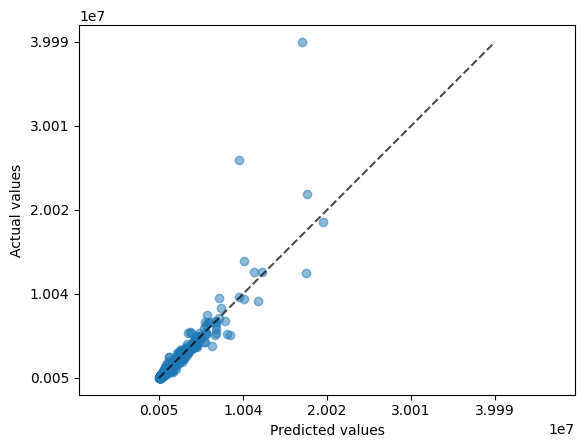

In [37]:
PredictionErrorDisplay.from_predictions(
    y_test,
    model_categorial.predict(X_test),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

#### 4.4.2 XGBoost

In [38]:
xgb_categorial = xgboost.XGBRegressor(n_estimators=200, max_depth=5, random_state=42)
xgb_categorial.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

#### Нарисуем значимость признаков

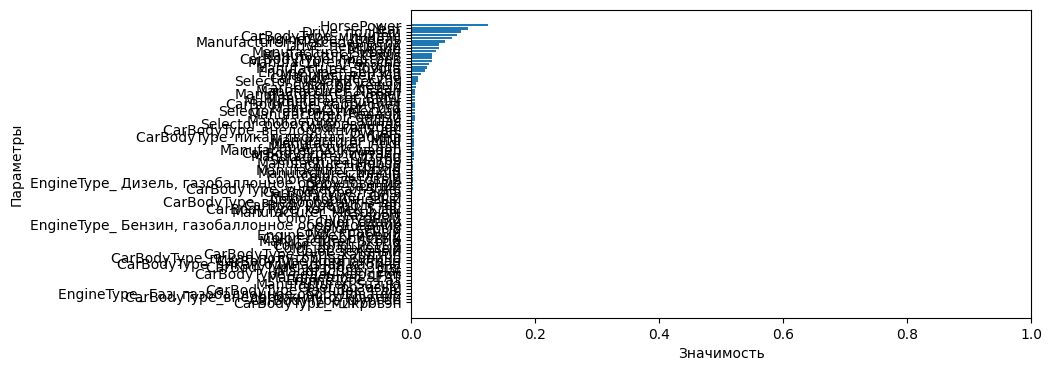

In [39]:
feature_importance_plotter_N(xgb_categorial, list(X_train.columns))

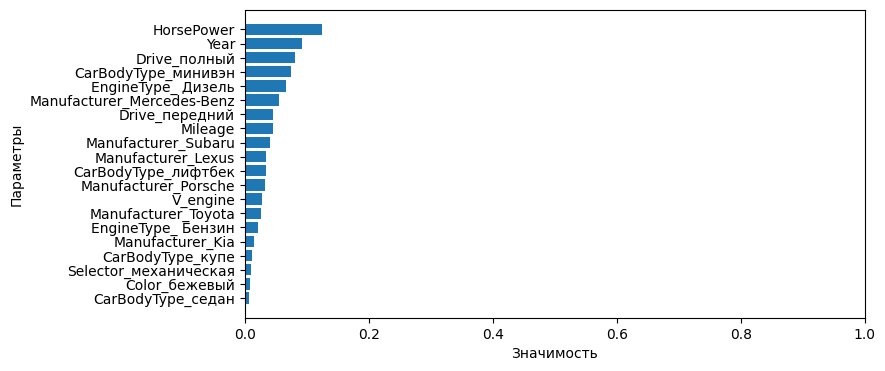

In [40]:
# Покажем лишь первые 20 значимых признаков для наглядности.
feature_importance_plotter_N(xgb_categorial, list(X_train.columns), N=20)

#### Метрики модели:

In [41]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, xgb_categorial.predict(X_train)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, xgb_categorial.predict(X_test)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, xgb_categorial.predict(X_train)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, xgb_categorial.predict(X_test)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, xgb_categorial.predict(X_train), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, xgb_categorial.predict(X_test), squared=False):.4f}")

r2 на тренировочной выборке: 0.9830
r2 на валидационной выборке: 0.9062
mse на тренировочной выборке: 49901904959.6446
mse на валидационной выборке: 271912699471.5818
rmse на тренировочной выборке: 223387.3429
rmse на валидационной выборке: 521452.4901


#### Визуализация ошибок

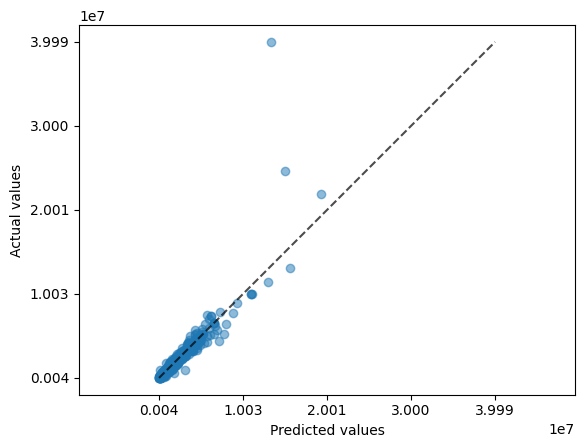

In [42]:
PredictionErrorDisplay.from_predictions(
    y_test,
    xgb_categorial.predict(X_test),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Выводы на модель с категориальными признаками:**
1. Добавление категориальрных признаков улучшило качество моделей. Метрика R2 изменилась следующим образом: 
    - *Random Forest*: с 0.8728 до 0.9024;
    - *XGBoost*: с 0.8810 до 0.9062;
2. Существуют единичные случаи выбросом и только в "больших" ценах.
3. Из всех 86 признаков, модель значимыми считает около 12 для Random Forest и 20 для XGBoost. Причем для <u>*Random Forest*</u> все новые категориальные признаки оказались менее значимыми, чем числовые и все новые категориальные признаки получили существенно низкий коэффициент значимости по сравнению с числовыми признаками. А для <u>*XGBoost*</u> распределение значимости распределилась плавнее и в более значимые попали такие признаки как **"Полный привод"**, **"Тип кузова минивен"** и **"Mersedes-Benz"**. Также обе модели самым значимым считают признак "Мощность двигателя".
4. В этом заметное отличие от линейной модели, которая существенно улучшила результат добавлением категориальных признаков с логическим объяснением (см. [Домашнее задание №2 из I семестра МОМО](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+URFUML2023+SEP2023/block-v1:Skillfactory+URFUML2023+SEP2023+type@sequential+block@d2116c46b42747f28fe973e78452d838/block-v1:Skillfactory+URFUML2023+SEP2023+type@vertical+block@284df12c828d4c6cafeb376d46275c4b?homework=4253))


### 4.5 Оценим влияние добавления полиномиальных признаков

In [43]:
# Создаем полиномиальный трансформер и преобразовываем данные
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_num)
X_test_poly = poly.transform(X_test_num)

In [44]:
# размерность полученного массива полиномиальный признаков
X_train_poly.shape

(24704, 15)

In [45]:
#  выделим датафрейм категориальных признаков для последующего объединения
X_train_cat = X_train.drop(columns = num_columns)

In [46]:
# размерность категориального массива
X_train_cat.shape

(24704, 82)

In [47]:
# преобразовываем в датафрейм и объединяем с датафреймом категориальных признаков
X_train_poly = pd.DataFrame(X_train_poly, index=X_train_cat.index)
X_train_w_poly = X_train_poly.merge(X_train_cat, how='inner', on=X_train_cat.index)

In [48]:
# Удалим получившуюсь индексную колонку
X_train_w_poly = X_train_w_poly.drop(columns = 'key_0')

In [49]:
# проверим размерность объединенного массива
X_train_w_poly.shape

(24704, 97)

In [50]:
# посмотрим на получившийся массив
X_train_w_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,Manufacturer_Nissan,Manufacturer_Opel,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_SEAT,Manufacturer_Skoda,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen
0,1.0,0.779634,0.057999,-0.250464,0.430558,0.607829,0.045218,-0.195271,0.335678,0.003364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.970140,0.155999,2.008956,1.890544,0.941171,0.151341,1.948967,1.834092,0.024336,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.593399,0.105999,0.825450,1.501889,0.352123,0.062900,0.489822,0.891220,0.011236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-1.876185,0.111110,-0.465647,-0.001748,3.520072,-0.208463,0.873641,0.003280,0.012345,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,-0.598286,0.167999,-0.788421,-1.043041,0.357946,-0.100511,0.471701,0.624036,0.028224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# сделаем тоже самое для тестовой выборки X_test
X_test_cat = X_test.drop(columns = num_columns)
X_test_poly = pd.DataFrame(X_test_poly, index=X_test_cat.index)
X_test_w_poly = X_test_poly.merge(X_test_cat, how='inner', on=X_test_cat.index)
X_test_w_poly = X_test_w_poly.drop(columns = 'key_0')

In [52]:
# посмотрим на получившийся массив тестовой выборки
X_test_w_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,Manufacturer_Nissan,Manufacturer_Opel,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_SEAT,Manufacturer_Skoda,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen
0,1.0,0.059393,0.234999,-0.680830,-0.651616,0.003527,0.013957,-0.040436,-0.038701,0.055225,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.905346,0.119999,3.300053,1.373012,0.819651,-0.108641,-2.987688,-1.243050,0.014400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.233369,0.152999,-0.250464,0.866587,0.054461,0.035705,-0.058451,0.202235,0.023409,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.411342,0.095027,-0.250464,-0.068945,0.169202,0.039089,-0.103026,-0.028360,0.009030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.233369,0.209999,-0.250464,-0.001748,0.054461,0.049007,-0.058451,-0.000408,0.044100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# необходимо для выполнения условия модели, чтобы названия всех признаков были строки
X_train_w_poly.columns = X_train_w_poly.columns.astype(str)
X_test_w_poly.columns = X_test_w_poly.columns.astype(str)

#### 4.5.1. Random Forest

In [ ]:
model_poly = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
model_poly.fit(X_train_w_poly, y_train) 

#### Нарисуем значимость признаков

In [ ]:
feature_importance_plotter_N(model_poly, list(X_train_w_poly.columns), N=20)

#### Метрики модели:

In [ ]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, model_poly.predict(X_train_w_poly)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, model_poly.predict(X_test_w_poly)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, model_poly.predict(X_train_w_poly)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, model_poly.predict(X_test_w_poly)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, model_poly.predict(X_train_w_poly), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, model_poly.predict(X_test_w_poly), squared=False):.4f}")

#### Визуализация ошибок

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_test,
    model_poly.predict(X_test_w_poly),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

#### 4.5.2. XGBoost

In [ ]:
xgb_poly = xgboost.XGBRegressor(n_estimators=200, max_depth=5, random_state=42)
xgb_poly.fit(X_train_w_poly, y_train) 

#### Нарисуем значимость признаков

In [ ]:
feature_importance_plotter_N(xgb_poly, list(X_train_w_poly.columns), N=30)

#### Метрики модели:

In [ ]:
print(f"r2 на тренировочной выборке: {r2_score(y_train, xgb_poly.predict(X_train_w_poly)):.4f}")
print(f"r2 на валидационной выборке: {r2_score(y_test, xgb_poly.predict(X_test_w_poly)):.4f}")

print(f"mse на тренировочной выборке: {mse(y_train, xgb_poly.predict(X_train_w_poly)):.4f}")
print(f"mse на валидационной выборке: {mse(y_test, xgb_poly.predict(X_test_w_poly)):.4f}")

print(f"rmse на тренировочной выборке: {mse(y_train, xgb_poly.predict(X_train_w_poly), squared=False):.4f}")
print(f"rmse на валидационной выборке: {mse(y_test, xgb_poly.predict(X_test_w_poly), squared=False):.4f}")

#### Визуализация ошибок

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_test,
    xgb_poly.predict(X_test_w_poly),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

**Выводы на модель с полиномиальными признаками:**

1. Добавление полиномиальных признаков еще немного изменило качество модели. Метрика R2 изменилась:
    - *Random Forest*: незначительный прирост с 0.9024 до 0.9014;
    - *XGBoost*: упало с 0.9062 до 0.9112.
2. Т.к. мы увеличили данные синтезировав новые нелинейные признаки, модель смогла использовать их в обучении.
2. Для *Random Forest* осталось 4-5 выбросов, а для *XGBoost* 1 выброс в больших ценах.
3. Новые полиномиальные признаки сложно интерпретировать. Совсем не понятно, какой признак за что отвечает и как влияет на качество модели;
4. *Random Forest*, как и ранее, значимыми указал производные числовые признаки, а у категориальных сильно занижена значимость  и всего по сути используется 20 признаков. *XGBoost* использует порядка 30 признаков и наряду с производными числовым значимо использует категориальные, такие как **"Тип двигателя-Дизель"**, **"Тип кузова-минивен"**, **"Передний привод"**. Но по-прежнему обе модели "солидарны", что самые значимые признаки - это **"8"** и **"4"** (новые производные полиномиальные признаки).
5. Наилучший результат в линейной модели был 0.8004 (см. [Домашнее задание №2 из I семестра МОМО](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+URFUML2023+SEP2023/block-v1:Skillfactory+URFUML2023+SEP2023+type@sequential+block@d2116c46b42747f28fe973e78452d838/block-v1:Skillfactory+URFUML2023+SEP2023+type@vertical+block@284df12c828d4c6cafeb376d46275c4b?homework=4253)), а наилучший результат для дерева решений был 0.8127 (см. [Домашнее задание №1 из II семестар МОМО](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+URFUML2023+SEP2023/block-v1:Skillfactory+URFUML2023+SEP2023+type@sequential+block@397f7bed7c3442ceb42a58c52aa0571a/block-v1:Skillfactory+URFUML2023+SEP2023+type@vertical+block@ed2d9955a45841bb870895e23afd7089?homework=4443)), что говорит о преимуществе ансамблевых моделей в данной задачи.
